In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import logging
import re
import string
import warnings
from pathlib import Path
from time import time

import arviz as az
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns
from theano import tensor as tt

from src.data_processing import achilles as achelp
from src.data_processing import common as dphelp
from src.globals import PYMC3
from src.io import cache_io, model_config
from src.loggers import logger, set_console_handler_level
from src.modeling import pymc3_analysis as pmanal
from src.modeling import pymc3_sampling_api as pmapi
from src.models import configuration
from src.plot.color_pal import FitMethodColors, ModelColors, SeabornColor

In [11]:
notebook_tic = time()

set_console_handler_level(logging.WARNING)
warnings.simplefilter(action="ignore", category=UserWarning)

gg.theme_set(
    gg.theme_bw()
    + gg.theme(
        figure_size=(4, 4),
        axis_ticks_major=gg.element_blank(),
        strip_background=gg.element_blank(),
    )
)
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 847
np.random.seed(RANDOM_SEED)
HDI_PROB = PYMC3.HDI_PROB

In [19]:
sp4_centered_cn = configuration.get_config_and_instantiate_model(
    model_config.get_model_config(),
    name="sp4-centered-copynum",
    root_cache_dir=cache_io.default_cache_dir(),
)
sp4_noncentered_cn = configuration.get_config_and_instantiate_model(
    model_config.get_model_config(),
    name="sp4-noncentered-copynum",
    root_cache_dir=cache_io.default_cache_dir(),
)

for sp in (sp4_centered_cn, sp4_noncentered_cn):
    sp.build_model()
    if sp.cache_manager.mcmc_cache_exists() and sp.cache_manager.advi_cache_exists():
        _ = sp.load_advi_cache()
        _ = sp.load_mcmc_cache()
    else:
        print("Either the MCMC or ADVI cache does not exist for '{sp.name}'.")

[07/09/21 15:50:28] WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1625860228.947037-227613;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:250
                             genes.

                    WARNING  Dropping 0 data points with missing   ]8;id=1625860228.959541-556250;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:260
                             copy number.

MCMC and ADVI cache exists for 'sp4-centered-copynum'.


[07/09/21 15:50:50] WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1625860250.537905-150324;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:250
                             genes.

                    WARNING  Dropping 0 data points with missing   ]8;id=1625860250.553208-50798;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:260
                             copy number.

MCMC and ADVI cache exists for 'sp4-noncentered-copynum'.


sp4-centered-copynum


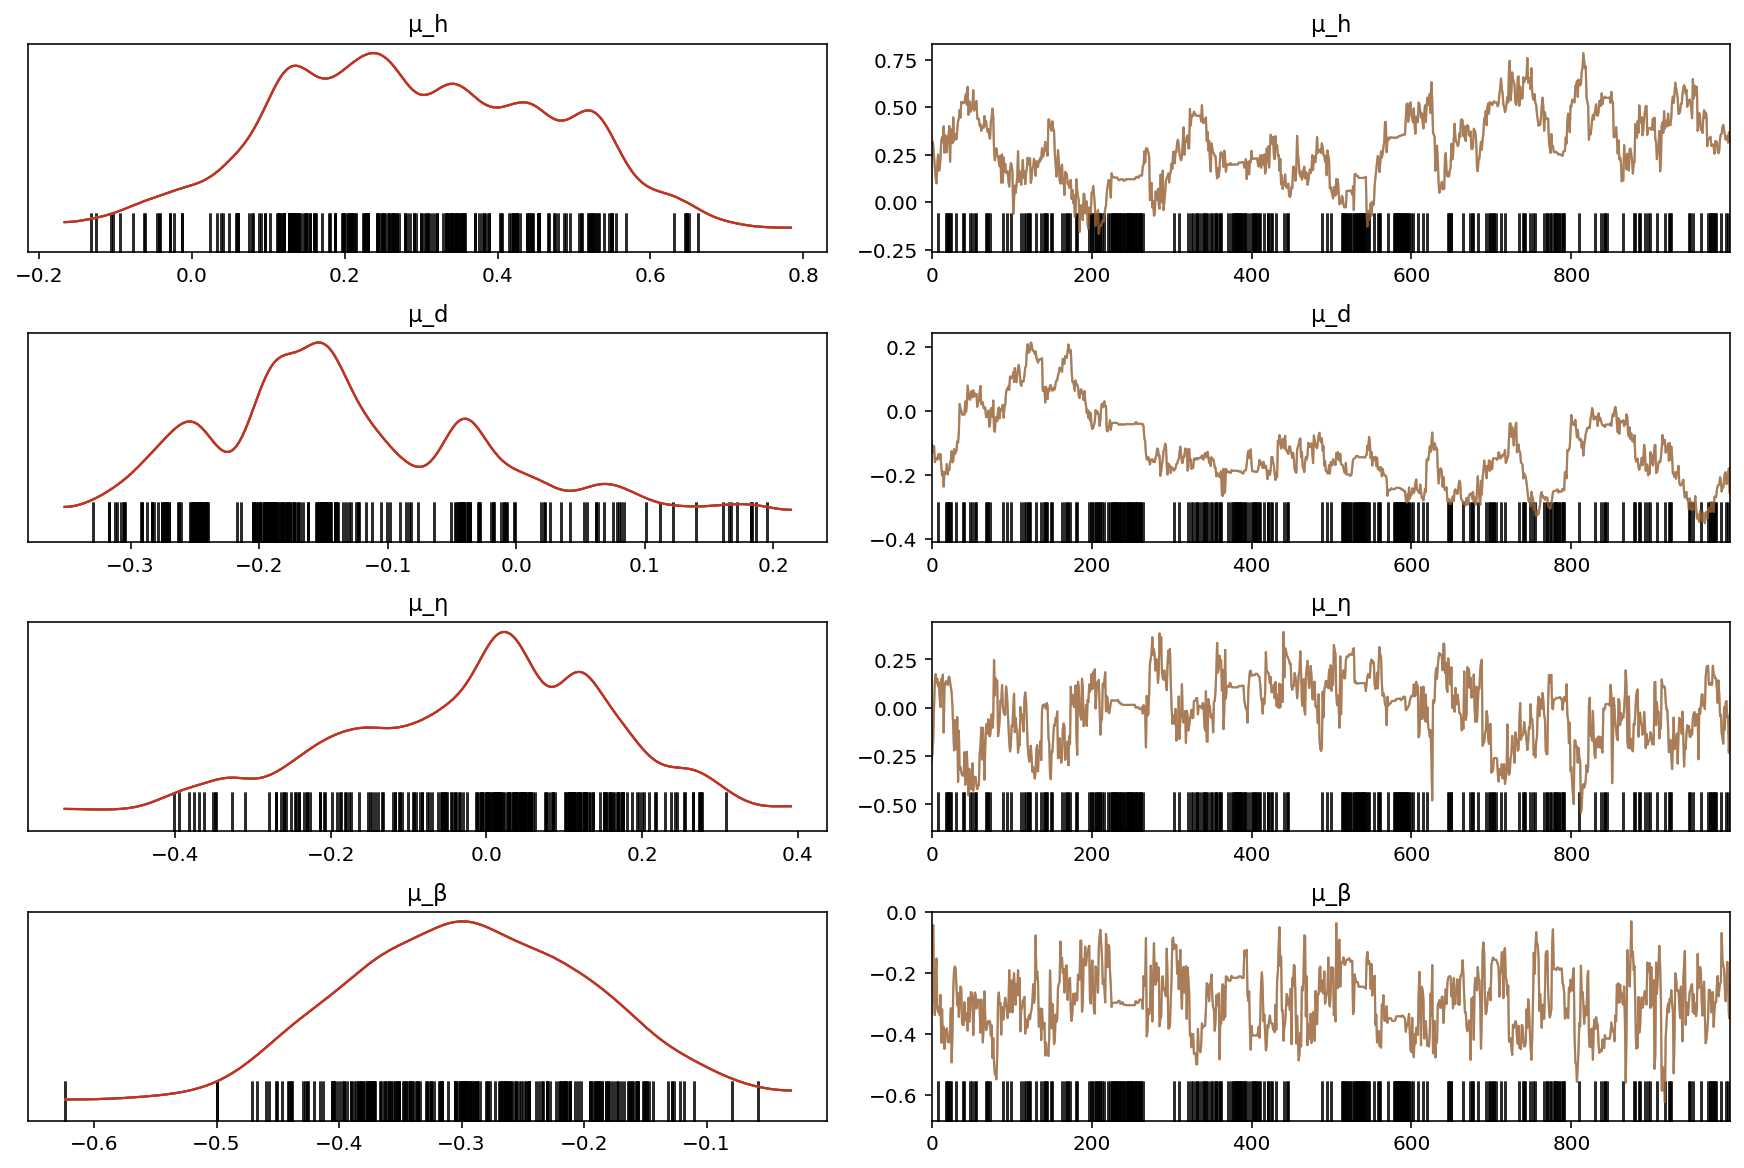

sp4-noncentered-copynum


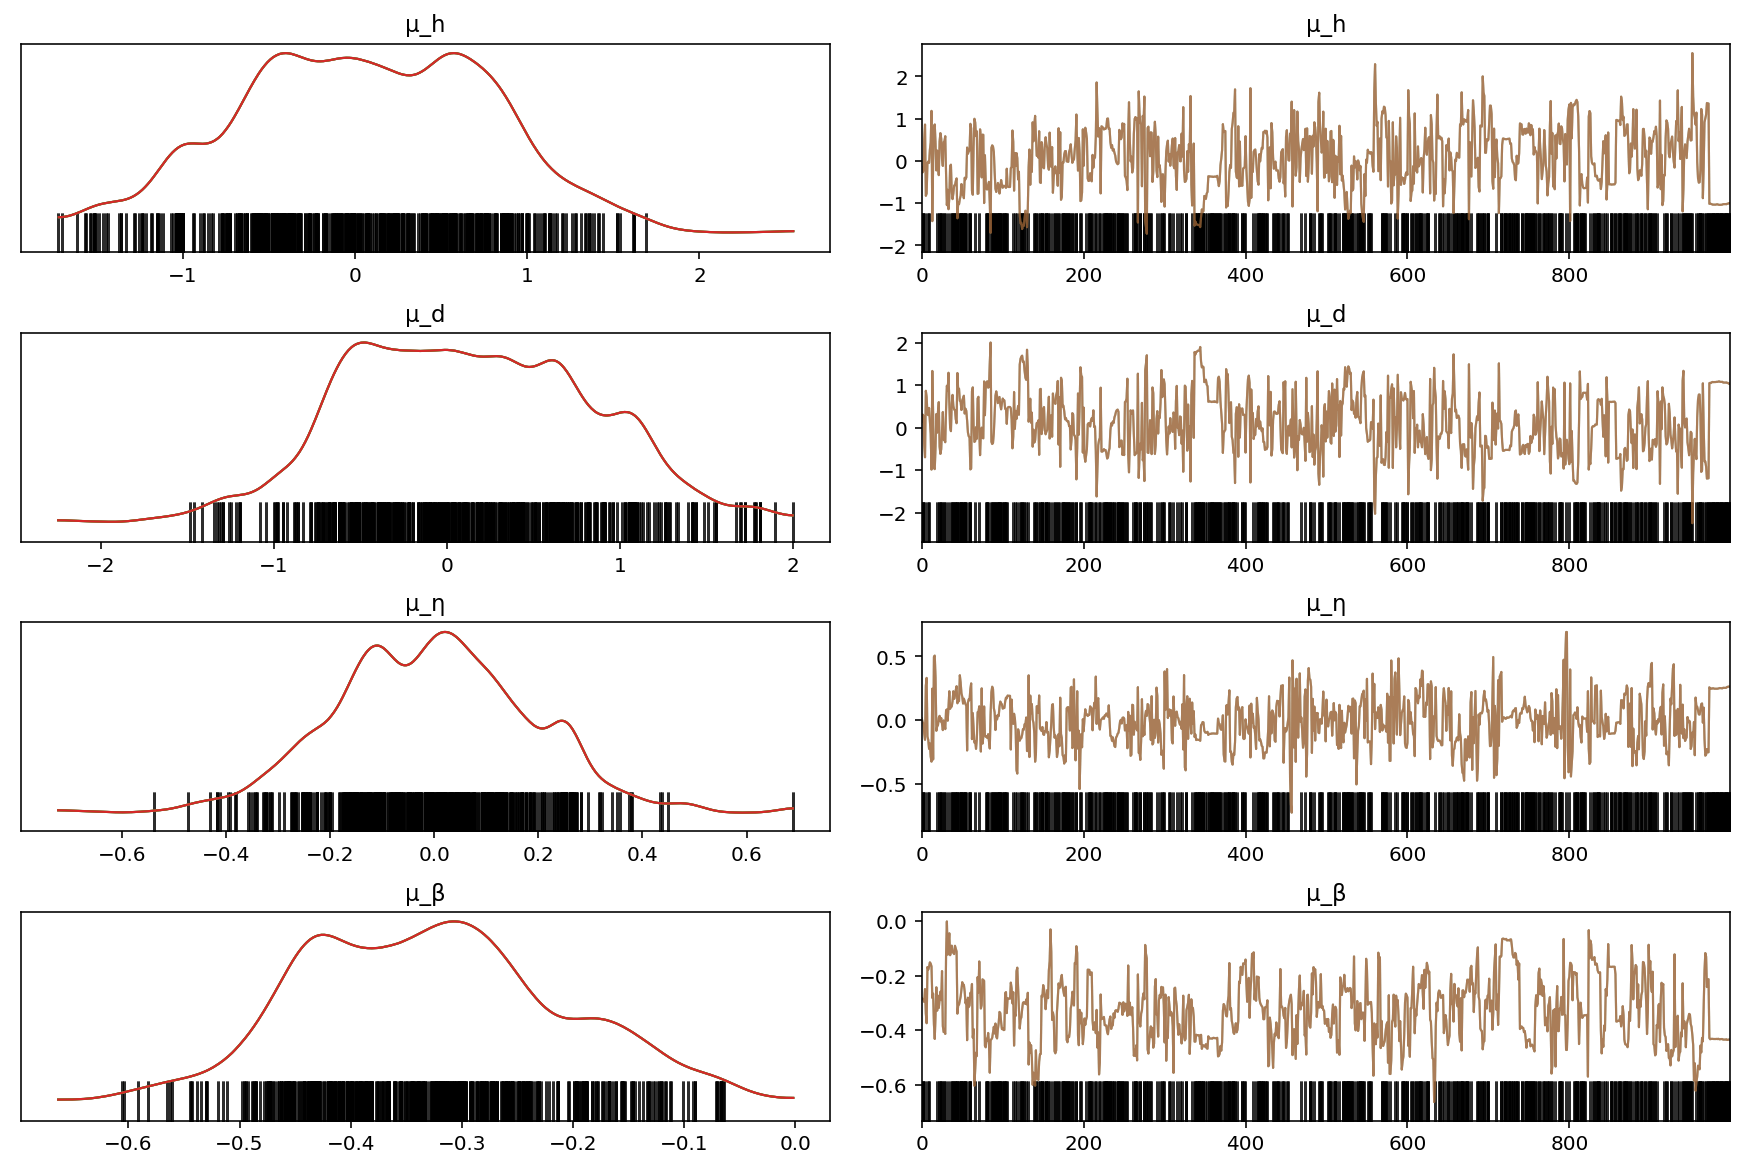

In [25]:
for sp in (sp4_centered_cn, sp4_noncentered_cn):
    print(sp.name)
    az.plot_trace(
        sp.mcmc_results, var_names=["μ_h", "μ_d", "μ_η", "μ_β"], compact=False
    )
    plt.show()

In [33]:
from datetime import datetime

datetime.now().isoformat()

'2021-07-09T16:28:06.358274'

---

In [ ]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

In [ ]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m